In [11]:
import numpy as np
from pandas import DataFrame
df2 = DataFrame.from_csv("treeoflife.species.evolution.tsv", sep="\t")
df2

/gpfs/ysm/project/dll44/conda_envs/py37_dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


,Evolution,Domain,Taxonomy_level2
Species_ID,,,
797210,0.926086,Archaea,Archaea_Euryarchaeota
590409,2.922177,Bacteria,Bacteria_Proteobacteria
272633,3.403909,Bacteria,Bacteria_Terrabacteria group
391592,2.435165,Bacteria,Bacteria_Proteobacteria
529709,0.656915,Archaea,Archaea_Euryarchaeota
700598,3.138932,Bacteria,Bacteria_FCB group
1028805,3.159647,Bacteria,Bacteria_Proteobacteria
273121,2.690462,Bacteria,Bacteria_Proteobacteria
478749,2.888448,Bacteria,Bacteria_Terrabacteria group


(array([ 95.,  14.,   0.,  56., 577., 416., 137.,  89.,  16.,   1.]),
 array([0.56414341, 1.00429715, 1.44445089, 1.88460463, 2.32475837,
        2.76491211, 3.20506585, 3.64521958, 4.08537332, 4.52552706,
        4.9656808 ]),
 <a list of 10 Patch objects>)

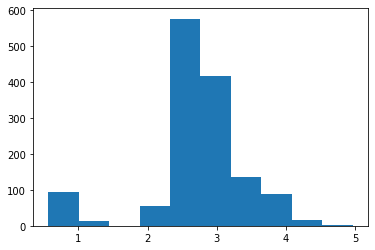

In [119]:
df2.head()
plt.hist(df2.Evolution)

In [ ]:
G_nx = nx.read_edgelist(filename)
X = nx.adjacency_matrix(G_nx).toarray()
# Initialize BDM object
bdm = BDM(ndim=2)
# Compute BDM
bdm.bdm(X)
# BDM objects may also compute standard Shannon entropy in base 2
bdm.ent(X)

In [ ]:
import os
import pandas as pd
import networkx as nx
from pandas import DataFrame
import numpy as np
from bdm import BDM

directory = os.fsencode('treeoflife.interactomes/treeoflife.interactomes').decode("utf-8")

df = pd.DataFrame(columns=["Species_ID", "nodes", "edges", "bdm", "ent"])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"): 
         G_nx = nx.read_edgelist(os.path.join(directory,filename))
         X = nx.adjacency_matrix(G_nx).toarray()
         # Initialize BDM object
         bdm = BDM(ndim=2)
         df = df.append({
             "Species_ID": os.path.splitext(filename)[0],
             "nodes": G_nx.number_of_nodes(),
             "edges": G_nx.number_of_edges(),
             "bdm": bdm.bdm(X),
             "ent": bdm.ent(X)
         }, ignore_index=True)
         #print(os.path.join(directory, filename))
         continue
     else:
         continue

import pickle
pickle.dump(df, open("species_bdm.p", "rb" ))    

In [8]:

import pickle
with open('species_bdm_backup.pkl', 'wb') as f:
    pickle.dump(df, f)  

In [10]:
df2.index = df2.index.astype(str)
df3 = pd.merge(df,df2,on="Species_ID")
df3

,Species_ID,nodes,edges,bdm,ent,Evolution,Domain,Taxonomy_level2
0,644284,417,1107,6152.258498,0.829148,2.657020,Bacteria,Bacteria_Terrabacteria group
1,573729,1339,5216,14473.775851,0.403707,3.742687,Eukaryota,Eukaryota_Opisthokonta
2,84588,668,1880,7115.660612,0.588453,2.573027,Bacteria,Bacteria_Terrabacteria group
3,163164,172,271,1881.472147,1.108038,2.945328,Bacteria,Bacteria_Proteobacteria
4,596327,250,260,2097.672060,0.781292,3.366176,Bacteria,Bacteria_FCB group
5,134676,1588,8604,22814.846113,0.434720,2.444246,Bacteria,Bacteria_Terrabacteria group
6,272844,415,1423,6873.264909,1.004510,0.656915,Archaea,Archaea_Euryarchaeota
7,903814,864,4392,16970.085297,0.695712,2.510388,Bacteria,Bacteria_Terrabacteria group
8,645465,869,2795,7851.040420,0.418975,2.539473,Bacteria,Bacteria_Terrabacteria group
9,720554,327,429,2934.123336,0.666101,2.461786,Bacteria,Bacteria_Terrabacteria group


In [12]:
import pickle
with open('species_bdm_df3.pkl', 'wb') as f:
    pickle.dump(df3, f) 

In [4]:
df

,Species_ID,nodes,edges,bdm,ent
0,393305,718,1213,4930.578963,0.392822
1,644284,417,1107,6152.258498,0.829148
2,573729,1339,5216,14473.775851,0.403707
3,84588,668,1880,7115.660612,0.588453
4,163164,172,271,1881.472147,1.108038
5,596327,250,260,2097.672060,0.781292
6,224914,684,1465,5557.010686,0.402763
7,134676,1588,8604,22814.846113,0.434720
8,375451,1230,6456,20625.295479,0.548457
9,272844,415,1423,6873.264909,1.004510


In [19]:
df3.sort_values(by=['bdm'],ascending=False)

,Species_ID,nodes,edges,bdm,ent,Evolution,Domain,Taxonomy_level2
1001,9606,16439,440135,212610.129805,0.358754,3.996755,Eukaryota,Eukaryota_Opisthokonta
879,10090,12498,354458,182193.904585,0.324822,3.995136,Eukaryota,Eukaryota_Opisthokonta
91,10116,9439,261737,142620.050447,0.255189,3.990036,Eukaryota,Eukaryota_Opisthokonta
1267,4932,6011,207622,140265.666420,1.335174,3.736744,Eukaryota,Eukaryota_Opisthokonta
425,3847,5785,89538,120802.372873,0.287801,3.670635,Eukaryota,Eukaryota_Viridiplantae
329,8364,6509,130423,117509.256234,0.316353,4.012386,Eukaryota,Eukaryota_Opisthokonta
791,3702,11256,167771,108518.297784,0.151353,3.655456,Eukaryota,Eukaryota_Viridiplantae
1145,7227,10132,116906,104530.173151,0.209733,2.945328,Eukaryota,Eukaryota_Opisthokonta
139,316407,2805,43518,100822.543666,1.149682,2.999311,Bacteria,Bacteria_Proteobacteria
720,6239,8091,82152,91977.130946,0.242250,3.732862,Eukaryota,Eukaryota_Opisthokonta


In [46]:
import os
print(os.getcwd() + "\n")

/home/dll/Python/treeoflife



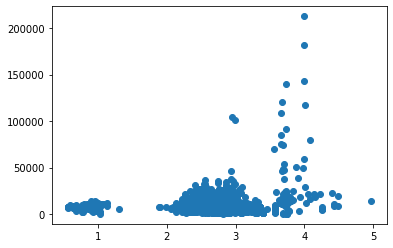

In [15]:
import matplotlib.pyplot as plt
import math
import pandas

fit = np.polyfit(pd.to_numeric(df3.nodes), pd.to_numeric(df3.bdm),1)
fit_fn = np.poly1d(fit) 
df3.bdm_node_resid = fit_fn(df3.nodes) - df3.bdm
#results = sm.ols(formula='Y ~ X1', data=df).fit()
#Y_pred = results.predict(df[["X1"]])
#residual = df["Y"].values-Y_preddkl
#reg = LinearRegression().fit(df3.nodes, df3.bdm)
#df3.bdm_node_resid = reg.predict(df3.nodes) - df3.bdm 

plt.scatter(df3.Evolution,df3.bdm)
#plt.scatter(df3.Evolution,np.log(df3.bdm_node_resid))

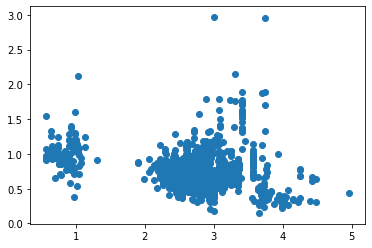

In [17]:
plt.scatter(df3.Evolution,df3.ent)

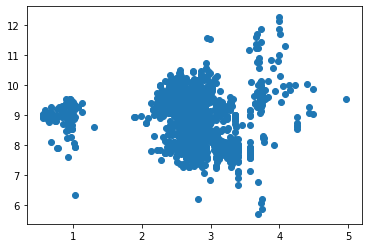

In [18]:
plt.scatter(df3.Evolution,np.log(df3.bdm))

In [56]:
directory = os.fsencode('treeoflife.interactomes/treeoflife.interactomes').decode("utf-8")

df = pd.DataFrame(columns=["species_id", "nodes", "edges", "bdm", "ent"])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"): 
        print(os.path.join(directory,filename))
        

treeoflife.interactomes/treeoflife.interactomes/871585.txt
treeoflife.interactomes/treeoflife.interactomes/384765.txt
treeoflife.interactomes/treeoflife.interactomes/399742.txt
treeoflife.interactomes/treeoflife.interactomes/390333.txt
treeoflife.interactomes/treeoflife.interactomes/904306.txt
treeoflife.interactomes/treeoflife.interactomes/871271.txt
treeoflife.interactomes/treeoflife.interactomes/749414.txt
treeoflife.interactomes/treeoflife.interactomes/273063.txt
treeoflife.interactomes/treeoflife.interactomes/383407.txt
treeoflife.interactomes/treeoflife.interactomes/679190.txt
treeoflife.interactomes/treeoflife.interactomes/718252.txt
treeoflife.interactomes/treeoflife.interactomes/164757.txt
treeoflife.interactomes/treeoflife.interactomes/452638.txt
treeoflife.interactomes/treeoflife.interactomes/879308.txt
treeoflife.interactomes/treeoflife.interactomes/362976.txt
treeoflife.interactomes/treeoflife.interactomes/548477.txt
treeoflife.interactomes/treeoflife.interactomes/596315.t

In [1]:
import numpy as np
import networkx as nx

G_nx = nx.read_edgelist('treeoflife.interactomes/treeoflife.interactomes/797210.txt')
#G_nx = nx.read_edgelist('../yeast_ppi/yeast.edgelist')

adj = nx.adjacency_matrix(G_nx).toarray()
lp = nx.laplacian_matrix(G_nx).toarray()
diag = lp + adj

print(G_nx.number_of_nodes())
print(G_nx.number_of_edges())

663
2849


In [2]:
print(adj)
print(lp)
print(diag)

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
[[16 -1 -1 ...  0  0  0]
 [-1 18 -1 ...  0  0  0]
 [-1 -1 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  2 -1 -1]
 [ 0  0  0 ... -1  2 -1]
 [ 0  0  0 ... -1 -1  2]]
[[16  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  2]]


In [3]:
print(np.sum(adj))
print(np.sum(diag))
vol = np.sum(diag)
print(vol)

5698
5698
5698


In [9]:
## moore penrose pseudoinverse, PCA approximation

L_inv = np.linalg.pinv(lp)
print(L_inv)

adj_inv = np.linalg.pinv(adj)
print(adj_inv)


[[ 0.07548651  0.01507992  0.01255288 ...  0.          0.
   0.        ]
 [ 0.01507992  0.06855474  0.01149375 ...  0.          0.
   0.        ]
 [ 0.01255288  0.01149375  0.04065544 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.22222222 -0.11111111
  -0.11111111]
 [ 0.          0.          0.         ... -0.11111111  0.22222222
  -0.11111111]
 [ 0.          0.          0.         ... -0.11111111 -0.11111111
   0.22222222]]
[[-0.3635868   0.08490863 -0.27820068 ...  0.          0.
   0.        ]
 [ 0.08490863 -0.29963634 -0.03968615 ...  0.          0.
   0.        ]
 [-0.27820068 -0.03968615 -0.35641029 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.5         0.5
   0.5       ]
 [ 0.          0.          0.         ...  0.5        -0.5
   0.5       ]
 [ 0.          0.          0.         ...  0.5         0.5
  -0.5       ]]


In [10]:
## ECDT; Euclidean Commute Time Distance
ubv = np.identity(adj.shape[1])

u,s,vh = np.linalg.svd(L_inv)
print(u.shape)
print(s.shape)

s_diag = np.diag(s)
print(s_diag.shape)

x = np.matmul(np.matmul(np.sqrt(s_diag),u),ubv)
print(x.shape)


(663, 663)
(663,)
(663, 663)
(663, 663)


In [11]:
ecdt = np.empty((adj.shape[1],adj.shape[1]))
for i in range(ecdt.shape[1]):
    for j in range(ecdt.shape[1]):
        ecdt[[i,j]] = vol*np.matmul(np.transpose(x[:,i]-x[:,j]),x[:,i]-x[:,j])
        
print(ecdt)

[[1259.15067442 1259.15067442 1259.15067442 ... 1259.15067442
  1259.15067442 1259.15067442]
 [1061.378022   1061.378022   1061.378022   ... 1061.378022
  1061.378022   1061.378022  ]
 [1099.94358429 1099.94358429 1099.94358429 ... 1099.94358429
  1099.94358429 1099.94358429]
 ...
 [ 712.64456006  712.64456006  712.64456006 ...  712.64456006
   712.64456006  712.64456006]
 [1702.40966858 1702.40966858 1702.40966858 ... 1702.40966858
  1702.40966858 1702.40966858]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


In [7]:
import matplotlib.pyplot as plt

plt.plot(x[:,0],x[:,1])

ModuleNotFoundError: No module named 'matplotlib'

In [12]:
## 2D BDM; parallel also available

import numpy as np
from bdm import BDM

# Create a dataset (must be of integer type)
#X = np.ones((100, 100), dtype=int)
#X = adj.toarray()[:100,:100]
#X1 = np.linalg.pinv(lp)

X = adj#ecdt[:100,:100]

# Initialize BDM object
bdm = BDM(ndim=2)

# Compute BDM
bdm.bdm(X)

# BDM objects may also compute standard Shannon entropy in base 2
bdm.ent(X)

0.8036436637413618

In [16]:
X = adj[:100,:100]

# Initialize BDM object
bdm = BDM(ndim=2)

# Compute BDM
print(bdm.bdm(X))

# BDM objects may also compute standard Shannon entropy in base 2
print(bdm.ent(X))

X = adj[:300,:300]

# Initialize BDM object
bdm = BDM(ndim=2)

# Compute BDM
print(bdm.bdm(X))

# BDM objects may also compute standard Shannon entropy in base 2
print(bdm.ent(X))

X = adj

# Initialize BDM object
bdm = BDM(ndim=2)

# Compute BDM
print(bdm.bdm(X))

# BDM objects may also compute standard Shannon entropy in base 2
print(bdm.ent(X))

4479.490875449148
3.734532149245968
9411.655753249672
1.676966544413016
11386.326563453838
0.8036436637413618


In [35]:
import pandas as pd
df = pd.DataFrame(index= range(100,adj.shape[1],100),
                   columns=['bdm','ent'])

for i in range(df.shape[0]):
    n = df.index[i]
    X = adj[:n,:n]
    # Initialize BDM object
    bdm = BDM(ndim=2)
    # Compute BDM
    #print([bdm.bdm(X),bdm.ent(X)])
    df.iloc[i] = [bdm.bdm(X),bdm.ent(X)]
    # BDM objects may also compute standard Shannon entropy in base 2
    #df1[[i,'end']] = bdm.ent(X)

In [36]:
print(df)

         bdm       ent
100  4479.49   3.73453
200  8009.88   2.49768
300  9411.66   1.67697
400  10651.1   1.39624
500    10921   1.09504
600  11295.1  0.898159


In [38]:
df['bdm']/df.index

100    44.7949
200    40.0494
300    31.3722
400    26.6276
500     21.842
600    18.8252
dtype: object

In [ ]:
## Perturbation analysis

import numpy as np
from bdm import BDM
from bdm.algorithms import PerturbationExperiment

# Create a dataset (must be of integer type)
X = np.ones((100, 100), dtype=int)

# Initialize BDM object
BDM = bdm(ndim=2)

# Initialize perturbation experiment object
# (may be run for both bdm or entropy)
perturbation = PerturbationExperiment(bdm, X, metric='bdm')

# Compute BDM change for all data points
delta_bdm = perturbation.run()

# Compute BDM change for selected data points and keep the changes while running
# One array provide indices of elements that are to be change.
idx = np.array([[0, 0], [10, 10]], dtype=int)
# Another array provide new values to assign.
# Negative values mean that new values will be selected
# randomly from the set of other possible values from the alphabet.
values = np.array([-1, -1], dtype=int)
delta_bdm = perturbation.run(idx, values, keep_changes=True)